In [1]:
from numpy import pi, log, sqrt
import pypolychord
from pypolychord.settings import PolyChordSettings
from pypolychord.priors import UniformPrior

Define a four-dimensional spherical gaussian likelihood,
 width sigma=0.1, centered on the 0 with one derived parameter.
 The derived parameter is the squared radius

In [2]:
nDims = 4
nDerived = 1
sigma = 0.1

def likelihood(theta):
    """ Simple Gaussian Likelihood"""

    nDims = len(theta)
    r2 = sum(theta**2)
    logL = -log(2*pi*sigma*sigma)*nDims/2.0
    logL += -r2/2/sigma/sigma

    return logL, [r2]

Define a box uniform prior from -1 to 1

In [3]:
def prior(hypercube):
    """ Uniform prior from [-1,1]^D. """
    return UniformPrior(-1, 1)(hypercube)

Optional dumper function giving run-time read access to
 the live points, dead points, weights and evidences

In [4]:
def dumper(live, dead, logweights, logZ, logZerr):
    print("Last dead point:", dead[-1])

Initialise the settings

In [5]:
settings = PolyChordSettings(nDims, nDerived)
settings.file_root = 'gaussian'
settings.nlive = 200
settings.do_clustering = True
settings.read_resume = False

Run PolyChord

In [6]:
output = pypolychord.run_polychord(likelihood, nDims, nDerived, settings, prior, dumper)

Last dead point: [-7.46582950e-01  1.82380196e-01 -5.81619119e-01  2.42022962e-01
  9.87504550e-01 -1.00000000e+30 -4.38406413e+01]
Last dead point: [ 4.80279558e-01  3.91669372e-01  1.46987429e-01 -4.30502158e-01
  5.91010764e-01 -1.00000000e+30 -2.40159519e+01]
Last dead point: [  0.25715113   0.41665476   0.33124151   0.04944084   0.35189323
 -28.54802223 -12.06007506]
Last dead point: [-0.32900744  0.10175554  0.02589236  0.28992762  0.20332853 -4.80783639
 -4.63184007]
Last dead point: [ 0.21234153  0.22602901  0.0421877   0.13876689  0.11721409 -5.09333323
 -0.32611822]
Last dead point: [ 0.18642882 -0.15441026 -0.00751542  0.12194214  0.0735246   1.76841269
  1.85835623]
Last dead point: [ 1.52671007e-01 -5.08385430e-02  3.07864843e-03  1.35219580e-01
  4.41868067e-02  2.09812462e+00  3.32524590e+00]
Last dead point: [ 0.13094237  0.01220333  0.06494948 -0.06108186  0.02524425  0.62926032
  4.27237352]
Last dead point: [-0.08782605  0.06917328 -0.04930714  0.02141103  0.01538798

Create a paramnames file

In [7]:
paramnames = [('p%i' % i, r'\theta_%i' % i) for i in range(nDims)]
paramnames += [('r*', 'r')]
output.make_paramnames_files(paramnames)

Make a getdist plot

chains/gaussian.txt
Removed no burn in


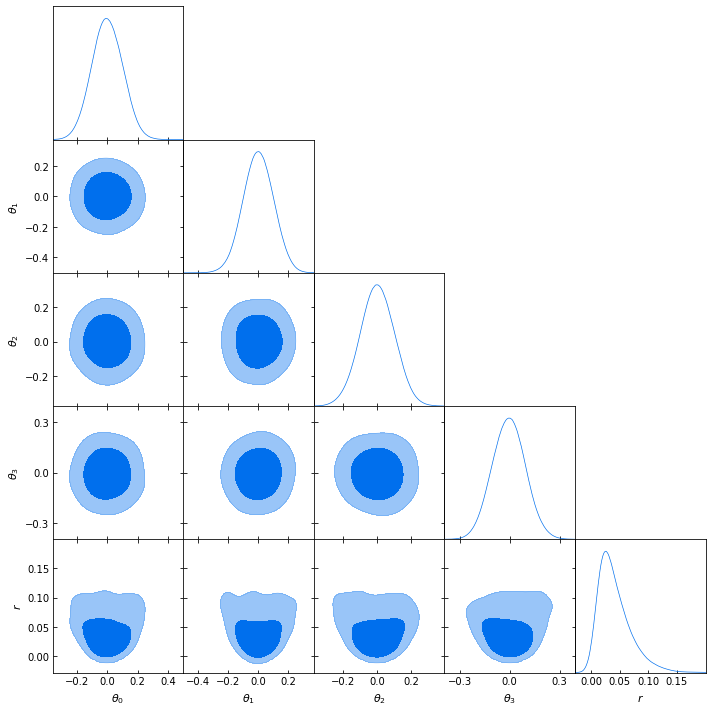

In [8]:
try:
    import getdist.plots
    %matplotlib inline
    posterior = output.posterior
    g = getdist.plots.getSubplotPlotter()
    g.triangle_plot(posterior, filled=True)
except ImportError:
    print("Install matplotlib and getdist for plotting examples")

In [9]:
output

Global evidence:
log(Z)    -2.352822 +/-  0.172999

Local evidences:
log(Z_1)    -6.578629 +/-  0.218284
log(Z_2)    -2.367678 +/-  0.173013

Run-time information:
ncluster           2.0
nposterior      3159.0
nequals          766.0
ndead           3159.0
nlive              0.0
nlike         269442.0
<nlike>            0.0

Parameter estimates:
p0  \theta_0     1.677E-03 +\- 1.006E-01
p1  \theta_1     1.481E-03 +\- 9.974E-02
p2  \theta_2     2.473E-03 +\- 9.878E-02
p3  \theta_3    -7.690E-03 +\- 1.001E-01
r*  r            3.993E-02 +\- 2.958E-02